In [1]:
# %%
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
import gc
import memory_profiler
import numpy
import cupy as np
import matplotlib.pyplot as plt
import PIL
import scipy
import more_itertools
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sys
import cv2
import glob
import os
import time
from matplotlib import style
#style.use('classic')
from numpy import genfromtxt, asarray, savez_compressed, load
from sklearn.model_selection import train_test_split
from PIL import Image 
from io import StringIO
import os


from tensorflow.python.platform import build_info as tf_build_info
import tensorflow.python.platform.build_info as build
print("TensorFlow verison: ",tf.__version__)
print("CUDA verison: ", build.build_info['cuda_version'])
print("CUDNN verison: ", build.build_info['cudnn_version'])

from tensorflow.python.client import device_lib

config = tf.compat.v1.ConfigProto()
#config.gpu_options.per_process_gpu_memory_fraction = 1
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)
print(device_lib.list_local_devices())

tf.config.experimental.list_physical_devices('GPU')

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

TensorFlow verison:  2.10.1
CUDA verison:  64_112
CUDNN verison:  64_8
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15558379567200817148
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4824498176
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5607380074186272581
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1060 with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 6.1"
xla_global_id: 416903419
]
Num GPUs Available:  1


In [2]:
try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

if IN_COLAB:
  print("We're running Colab")

if IN_COLAB:
  # Mount the Google Drive at mount
  mount='/content/drive'
  print("Colab: mounting Google drive on ", mount)

  drive.mount(mount)

  # Switch to the directory on the Google Drive that you want to use
  import os
  drive_root = mount + "/My Drive/Colab Notebooks/ML-for-IC-Die-Images"
  
  # Create drive_root if it doesn't exist
  create_drive_root = True
  if create_drive_root:
    print("\nColab: making sure ", drive_root, " exists.")
    os.makedirs(drive_root, exist_ok=True)
  
  # Change to the directory
  print("\nColab: Changing directory to ", drive_root)
  %cd $drive_root
  !pwd

  !pip install -r requirements.txt
  !sudo apt-get autoremove


  from IPython.display import JSON
  from google.colab import output
  from subprocess import getoutput
  
  # @title jQuery Terminal's [Features](https://terminal.jcubic.pl/)

  def shell(command):
    if command.startswith('cd'):
      path = command.strip().split(maxsplit=1)[1]
      os.chdir(path)
      return JSON([''])
    return JSON([getoutput(command)])
  output.register_callback('shell', shell)

In [3]:
# Change as you wish
if IN_COLAB:
  IMAGE_INPUT_FOLDER = './data/Image_Input'
  IMAGE_OUTPUT_FOLDER = './data/Image_Output'
else:
  IMAGE_INPUT_FOLDER = './../data/Image_Input'
  IMAGE_OUTPUT_FOLDER = './../data/Image_Output'


# myData = pd.read_csv(os.path.join(DATASET_FOLDER, PENDULUM_DATA))
# myData.round(decimals=6)
# myData = myData.astype(np.float32)
# myData = myData.astype(np.float16)
# myData.describe().transpose()


In [4]:
input_image_path = os.path.join(IMAGE_INPUT_FOLDER)
output_image_path = os.path.join(IMAGE_INPUT_FOLDER)

In [5]:


input_filenames = glob.glob(os.path.join(input_image_path,'*.jpg'))
output_filenames = glob.glob(os.path.join(output_image_path,'*.jpg'))


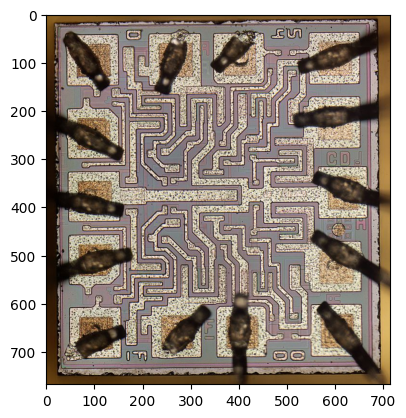

(768, 714, 3)


In [6]:
inputDataset = []
outputDataset = []


for input_filename in input_filenames:
    # image=Image.open(input_filename)
    image = cv2.imread (input_filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image.reshape(image.shape[0],image.shape[1],image.shape[2])
    resized_image = resize_with_padding(image, 500)
plt.imshow(resized_image)
plt.show()
    plt.imshow(image)
    plt.show()
    print(image.shape)
    break

In [7]:
import cv2
import numpy as np

def resize_with_padding(image, size):
    # Get the dimensions of the original image
    h, w = image.shape[:2]

    # Compute the ratio of the new image to the old image
    r = float(size) / max(h, w)

    # Compute the new size of the image
    new_size = (int(w * r), int(h * r))

    # Resize the image
    resized_image = cv2.resize(image, new_size, interpolation=cv2.INTER_AREA)

    # Compute the amount of padding needed
    h_pad = size - new_size[1]
    w_pad = size - new_size[0]

    # Compute the amount of padding on each side
    top_pad = h_pad // 2
    bottom_pad = h_pad - top_pad
    left_pad = w_pad // 2
    right_pad = w_pad - left_pad

    # Create a border around the image
    padded_image = cv2.copyMakeBorder(resized_image, top_pad, bottom_pad, left_pad, right_pad,
                                      cv2.BORDER_CONSTANT, value=[0, 0, 0])

    return padded_image


(500, 500, 3)

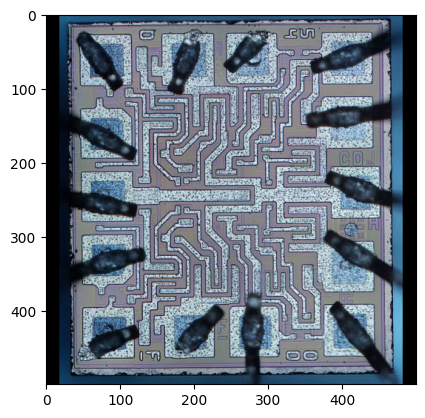

In [ ]:
          
      
                image=Image.open(myFile)
                image = cv2.imread (myFile)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = image.reshape(image.shape[0],image.shape[1],image.shape[2])
                #plt.imshow(image)
                #plt.show()
                if image.shape != (425,311,3):
                    print(myFile)
                    plt.imshow(image)
                    plt.show()
                    print(image.shape)
                    #os.remove(myFile)
                    #prepData()
                    break
                im_data.append(np.asnumpy(image))
                proceed = True
            print(count)
    
        else:
            for myFile in files:
                print(myFile)
                image=Image.open(myFile)
                image = cv2.imread (myFile)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = image.reshape(image.shape[0],image.shape[1],image.shape[2])
                #plt.imshow(image)
                #plt.show()
                if image.shape != (425,311,3):
                    print(myFile)
                    plt.imshow(image)
                    plt.show()
                    print(image.shape)
                    #os.remove(myFile)
                    prepData()
                    break
                im_data.append (np.asnumpy(image))
                proceed = False
            
        if proceed:
            im_data_len = len(im_data)
            if im_data_len != 6:
                raise Exception(f'Wrong image count: Expected 3 files but got {im_data_len}. Please rectify')
            
            imageDataset = numpy.concatenate((im_data[0], im_data[1],
                                              im_data[2], im_data[3],
                                              im_data[4], im_data[5]), axis=2)
            image_dat.append(imageDataset)
            value = (datasetPrime[i][1][0])
            if value=='10010' or value=='10001':
               value = 0
            elif value=='01010' or value=='01001':
                value = 1
            elif value=='00110' or value=='00101' :
                value = 2
            
            loc_data.append(value)
            #print('image_data shape:', np.asnumpy(image_dat).shape)           
            #print('im_data shape:', np.array(im_data).shape)
            short_dat.append(short)
            #print('short',short)
            #print('count',count)
            im_data = []

    short_data = np.asnumpy(short_dat)/100.         
    image_dat = np.asnumpy(image_dat)/255.
    y_data=[]
    for i in range(len(short_data)):
        y_data.append([short_data[i],loc_data[i]])
    print('imageDataset shape: ', imageDataset.shape)
    print('short_data size: ', short_data.shape)
    print(len(image_dat), 'sets of images prepared')

    x_train, x_test, y_train, y_test = train_test_split(image_dat, y_data, train_size=train_split, random_state=50)
    #x_train=image_dat[:num_train]
    #x_test=image_dat[num_train:]
    #y_train=y_data[:num_train]
    #y_test=y_data[num_train:]

    del image_dat
    gc.collect()
    y_train = np.asnumpy(y_train)
    y_test = np.asnumpy(y_test)

    outfile_0 = f'C:\\Users\\hp\\iCloudDrive\\Final Year Project\\Matlab\\Windings\\myFile_train{folderNum}'
    outfile_1 = f'C:\\Users\\hp\\iCloudDrive\\Final Year Project\\Matlab\\Windings\\myFile_test{folderNum}'
    
    savez_compressed(outfile_0, x_train=x_train, y_train=y_train)
    savez_compressed(outfile_1, x_test=x_test, y_test=y_test)

    #print('x_train shape: ', x_train.shape) 
    #print('y_train[0] shape: ', y_train[:,0].shape)
    #print('y_train[1] shape: ', y_train[:,1].shape)    
    #print('x_test shape: ', x_test.shape)  
    #print('y_test[0] shape: ', y_test[:,0].shape)
    #print('y_test[1] shape: ', y_test[:,1].shape)
    print('Folder Number:', folderNum)
    print('Done')

# %%
num_images = 6
percentage_class = 1
location_class = 3
length = int((600 * 6 * num_images))
num_data = int(length/6)
print(f'{num_data} sets of images will be generated.')
train_split = 0.80
channels = num_images * 3 #6 RGB images (3 channels)
imageDataset = numpy.ndarray(shape=(425,311, channels))
num_train = int(train_split * num_data)
num_val = int(0.7*(num_data - num_train))
num_test = (num_data - num_train) - num_val
print('num_train:',num_train, 'num_val:',num_val, 'num_test:',num_test)


# %%

myList = list(more_itertools.windowed(range(length), n=600, step=600))

def iterfunct():
    global count
    global idx
    global myList
    global count_iter
    newRange = myList[idx]
    idx+=1
    count_iter+=len(newRange)/6
    return newRange,(count_iter-len(newRange)/6)


idx=0
count_iter=0 
count = 0
#folderNum=0
for folderNum in range(12):
    iter_length, count = iterfunct()
    print(iter_length,count)
    #dataset_gen(iter_length, count, folderNum)


folderNum=0

for i in range(12):
    #global X_train
    #global X_test
    #global Y_train
    #global Y_test
    print('folderNum', folderNum)
    outfile_0 = f'C:\\Users\\hp\\iCloudDrive\\Final Year Project\\Matlab\\Windings\\myFile_train{folderNum}.npz'
    outfile_1 = f'C:\\Users\\hp\\iCloudDrive\\Final Year Project\\Matlab\\Windings\\myFile_test{folderNum}.npz'
    data0 = numpy.load(outfile_0, allow_pickle=True)
    data1 = numpy.load(outfile_1, allow_pickle=True)
    if i == 0:
        x_train=(data0['x_train'][:])
        x_test=(data1['x_test'])
        y_train=(data0['y_train'][:])
        y_test=(data1['y_test'])
    else:
        x_train=numpy.vstack([x_train, data0['x_train'][:]])
        x_test=numpy.vstack([x_test, data1['x_test']])
        y_train=numpy.vstack([y_train, data0['y_train'][:]])
        y_test=numpy.vstack([y_test, data1['y_test']])
    
    if (folderNum+1)%12==0:
        folderNum=0
    else: 
        folderNum+=1

    print('X_data Size:', len(x_train) + len(x_test))
    print('Y_data Size:', len(y_train) + len(y_test))
# %%

y_Train=[]
x_Train=[]
train_idx=[]
for idx, val in enumerate(y_train[:,0]):
    if val>=0.5:
        #y_Train.append(y_train[idx])
        #x_Train.append(x_train[idx])
        train_idx.append(idx)

y_Test=[]
x_Test=[]
test_idx=[]
for idx, val in enumerate(y_test[:,0]):
    if val>=0.5:
        #y_Test.append(y_test[idx])
        #x_Test.append(x_test[idx])
        test_idx.append(idx)



#x_train = np.asnumpy(x_Train)#.reshape(-1,177,267,18)
#y_test = np.asnumpy(y_Train).reshape(-1,2)
#x_test = np.asnumpy(x_Train)#.reshape(-1,177,267,18)
#y_test= np.asnumpy(y_Train).reshape(-1,2)

x_train = numpy.delete(np.asnumpy(x_train),train_idx, axis=0)
y_train = numpy.delete(np.asnumpy(y_train),train_idx, axis=0)
x_test = numpy.delete(np.asnumpy(x_test),test_idx, axis=0)
y_test = numpy.delete(np.asnumpy(y_test),test_idx, axis=0)

print(y_test)
# %%

print('Saving final files')

outfile_0 = f'C:\\Users\\hp\\iCloudDrive\\Final Year Project\\Matlab\\Windings\\myFile_train_final'
outfile_1 = f'C:\\Users\\hp\\iCloudDrive\\Final Year Project\\Matlab\\Windings\\myFile_test_final'
    
numpy.savez_compressed(outfile_0, x_train=x_train, y_train=y_train)
numpy.savez_compressed(outfile_1, x_test=x_test, y_test=y_test)


# %%

#print(str(f'C:\\Users\\hp\\iCloudDrive\\Final Year Project\\Matlab\\Windings1\\myFile_healthy' + '*.png'))    
short_dat=[]
im_data = []
image_dat=[]
loc_data =[] 

files=glob.glob(str(f'C:\\Users\\hp\\iCloudDrive\\Final Year Project\\Matlab\\Windings\\Healthy\\' + '*.png'))
#print(files)
flen = len(files)

for myFile in files:
                #print(myFile)
                image=Image.open(myFile)
                image = cv2.imread (myFile)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = image.reshape(image.shape[0],image.shape[1],image.shape[2])
                #plt.imshow(image)
                #plt.show()
                if image.shape != (221,334,3):
                    print(myFile)
                    plt.imshow(image)
                    plt.show()
                    print(image.shape)
                    #os.remove(myFile)
                    prepData()
                    break
                im_data.append(np.asnumpy(image))
                proceed = True
            #print(count)"""
#print(files)


im_data_len = len(im_data)
if im_data_len != 6:
    raise Exception(f'Wrong image count: Expected 3 files but got {im_data_len}. Please rectify')
            
imageDataset = numpy.concatenate((im_data[0], im_data[1],
                                              im_data[2], im_data[3],
                                              im_data[4], im_data[5]), axis=2)/255.


x_train = np.asnumpy(imageDataset.reshape(1, 221, 334, -1))
print(x_train.shape)

y_train = [1e-16, 3]
y_train = np.asnumpy(y_train).reshape(1,-1)
print(y_train.shape)

outfile_0 = f'C:\\Users\\hp\\iCloudDrive\\Final Year Project\\Matlab\\Windings\\myFile_healthy'
    
savez_compressed(outfile_0, x_train=x_train, y_train=y_train)
print('Done')


# %%
